# **Importing libraries**

In [ ]:
#import commands of libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# **Importing dataset**

In [ ]:
#import dataset here
df=pd.read_excel('sensor_stream_full.xlsx')
df.head()

,record,sensorType,areaName,sensorName,sensorBookmarkName,sessionID,Timestring,sensorValue
0,NaN,0,MiscSensors,K_TS_AboveStove,NaN,0,1/14/2018 12:00:02 AM,0.000000
1,NaN,1,Bedroom,B_PS_Door,dressing,0,1/14/2018 2:30:00 PM,1.000000
2,NaN,3,MiscSensors,K_LS,dressing,0,1/14/2018 2:30:00 PM,0.583290
3,NaN,3,MiscSensors,B_LS,dressing,0,1/14/2018 2:30:00 PM,0.583290
4,NaN,3,MiscSensors,LR_LS,dressing,0,1/14/2018 2:30:00 PM,0.583289


# **Data preprocessing**

In [ ]:
### remove here first record column because here is no value so it will have no information for the model
df.drop(columns='record',inplace=True)

In [ ]:
### Check the columns name of our dataset
df.columns

Index(['sensorType', 'areaName', 'sensorName', 'sensorBookmarkName',
       'sessionID', 'Timestring', 'sensorValue'],
      dtype='object')

In [ ]:
### check each column types  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35213 entries, 0 to 35212
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sensorType          35213 non-null  int64  
 1   areaName            35213 non-null  object 
 2   sensorName          35213 non-null  object 
 3   sensorBookmarkName  35210 non-null  object 
 4   sessionID           35213 non-null  int64  
 5   Timestring          35213 non-null  object 
 6   sensorValue         34948 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
df.shape

(35213, 7)

In [ ]:
'''Check each column mean value and summarizes the distribution of each attribute.
It also  give us an idea about the spread of the data.'''

df.describe()

,sensorType,sessionID,sensorValue
count,35213.000000,35213.0,34948.000000
mean,2.230085,0.0,0.604929
std,1.376519,0.0,0.418716
min,0.000000,0.0,0.000000
25%,0.000000,0.0,0.000000
50%,3.000000,0.0,0.851624
75%,3.000000,0.0,0.938064
max,5.000000,0.0,1.234750


In [ ]:
### Check the correlation of each column with each other
df.corr()

,sensorType,sessionID,sensorValue
sensorType,1.000000,NaN,0.837097
sessionID,NaN,NaN,NaN
sensorValue,0.837097,NaN,1.000000


# **Check missing value in our dataset**

In [ ]:
### Here we check the missing value of each column in our dataset 
miss_per=df.isnull().sum()/df.shape[0]*100
miss_per

sensorType            0.000000
areaName              0.000000
sensorName            0.000000
sensorBookmarkName    0.008520
sessionID             0.000000
Timestring            0.000000
sensorValue           0.752563
dtype: float64

In [ ]:
# filling missing value
df=df.fillna(method='bfill')

# **Exploratory data analysis (EDA)**

In [ ]:
### Check the unique values of our target column
df['sensorBookmarkName'].unique()

array(['dressing', 'cooking', 'sleeping'], dtype=object)

So from the unique values we can see how many types of bookmark name is here 

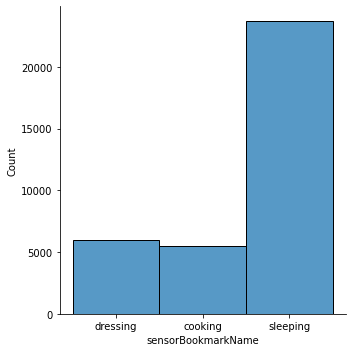

In [ ]:
#### Check the each bookmark count using histogram
sns.displot(df['sensorBookmarkName'])

So using the histogram we can see the total quantity of different three types of bookmarks 

In [ ]:
### Check the unique values of sensor type
df['sensorType'].unique()

array([0, 1, 3, 4, 5])

so we can see from this there are totally 5 types of sensor

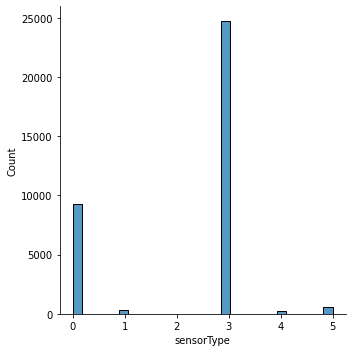

In [ ]:
#### Check the each sensor type  count using histogram
sns.displot(df['sensorType'])

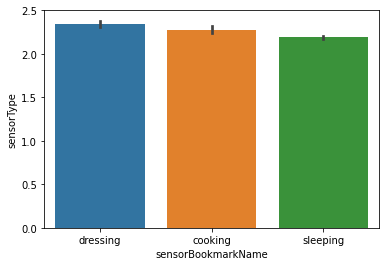

In [ ]:
##making bar graphs using sensorBookmarkName and sensorBookmarkName
sns.barplot(x = df['sensorBookmarkName'], y = df['sensorType'])

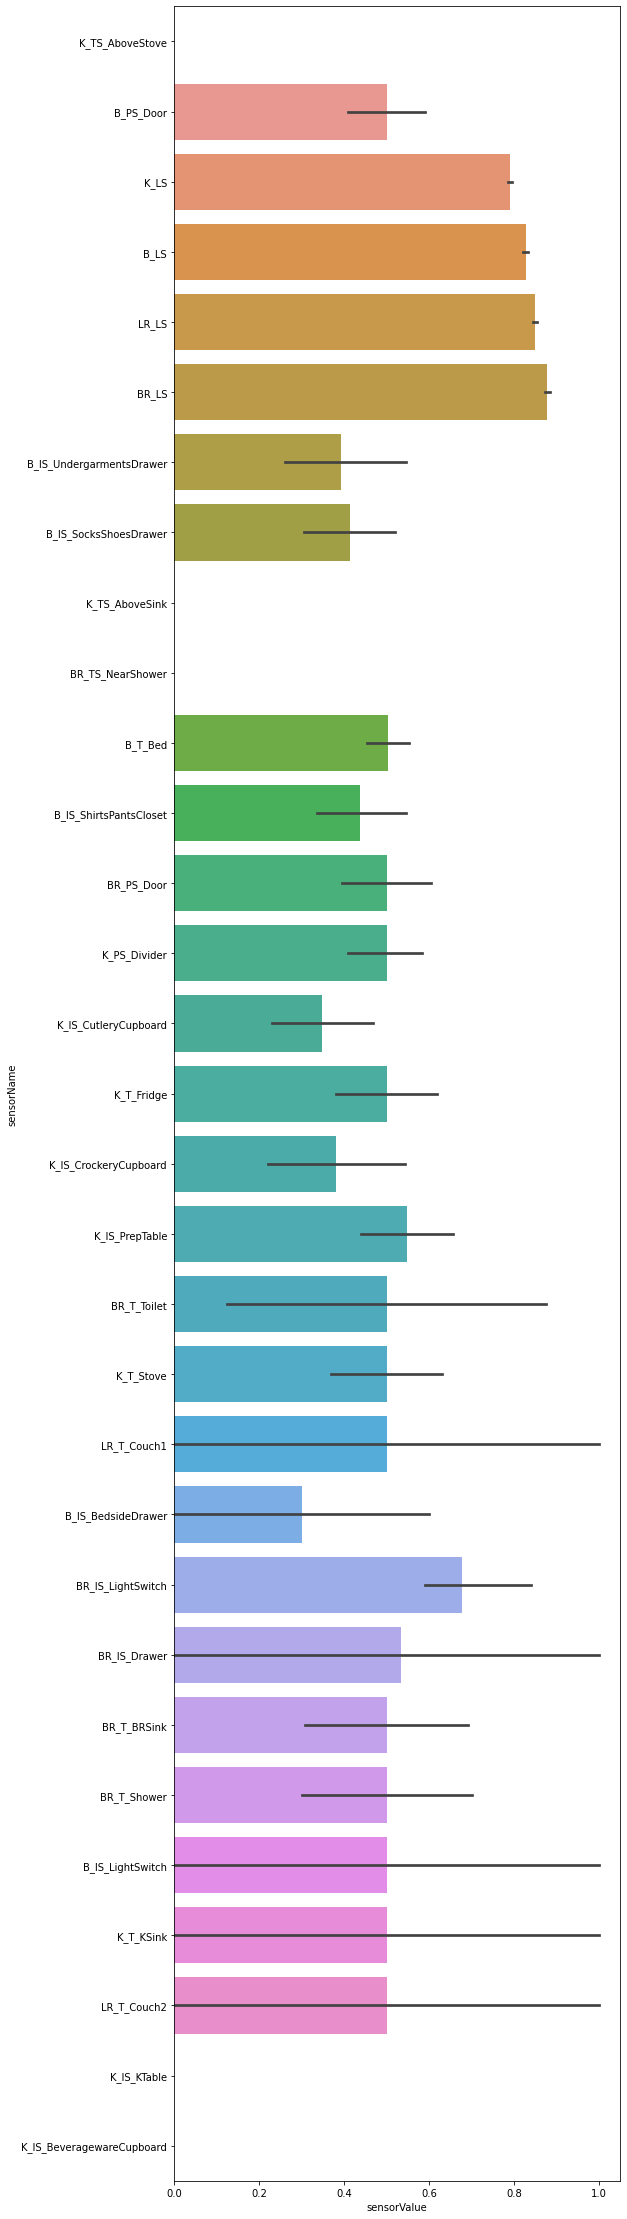

In [ ]:
## see comparison with sensorName and sensorValue
# we will see here each sensor values
plt.figure(figsize=(8,40))
sns.barplot(x = df['sensorValue'], y = df['sensorName'])

# **Convert categorical columns into numeric form**

In [ ]:
### Now we are forwarding towards our model building section. So machine understand only the numeric form. 
### so we convert first the categorical columns into the numeric form and then build the model.

# First we extract the categorical columns.
cat_val=df.select_dtypes(include=['bool','category','object'])
cat_val.columns

Index(['areaName', 'sensorName', 'sensorBookmarkName', 'Timestring'], dtype='object')

In [ ]:
### Import label Encoder for converting the value into the numeric form
from sklearn.preprocessing import LabelEncoder
for var in cat_val:
  df[var]=LabelEncoder().fit_transform(df[var])

In [ ]:
df.head()

,sensorType,areaName,sensorName,sensorBookmarkName,sessionID,Timestring,sensorValue
0,0,5,24,1,0,2,0.000000
1,1,1,14,1,0,3893,1.000000
2,3,5,21,1,0,3893,0.583290
3,3,5,13,1,0,3893,0.583290
4,3,5,28,1,0,3893,0.583289


We can see all the categorical columns has been converted into the numeric form

# **Creating dependent and independent variables**

In [ ]:
### Taking 'sensorType','areaName','sensorName','sensorValue' as independent features and sensorBookmarkName is out target feature
X=df[['sensorType','areaName','sensorName','sensorValue']]
y=df['sensorBookmarkName']

# **Splitting the dataset into training and testing**

In [ ]:
# there are total 35213 rows so we split this 25000 for traing and take test reamaing 5213 entries as test
x_train=X[0:25000]
x_test=X[25000:35213]
y_train=y[0:25000]
y_test=y[25000:35213]

# **1st Model**

# **Random Forest Model**

# Hyper parameter tunning using GridSearchCV

In [ ]:
# import comand of gridsearchcv
from sklearn.model_selection import GridSearchCV
# choosing different parameter for test
params={
     'n_estimators':[50,100],
    'max_depth':[20,30]
}
# Random forest model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0)

# Applying Gridsearchcv by giving model random forest
grid_search=GridSearchCV(model, param_grid=params, n_jobs=-1, cv=2)
grid_search.fit(x_train,y_train)

# Checking random forest best parameters 
grid_search.best_params_

{'max_depth': 20, 'n_estimators': 100}

# Random Forest model Training

In [ ]:
# fitting the random forest model 
classifier = RandomForestClassifier(n_estimators=100, random_state=0,max_depth=20)
RF_model=classifier.fit(x_train,y_train)
RF_model

RandomForestClassifier(max_depth=20, random_state=0)

# Model prediction

In [ ]:
#Getting prediction from model by giving testing data
y_pred = classifier.predict(x_test)
RF_prediction=pd.DataFrame(y_pred,columns=['RF_prediction'])
RF_prediction

,RF_prediction
0,2
1,0
2,0
3,1
4,2
...,...
10208,2
10209,2
10210,2
10211,0


here 'dressing'=1, 'cooking'=3, 'sleeping'=2,   here are the values are in numeric because model take numeric value and also gave numeric values. So we when we convert the categorical values into numeric so our targets was changed in this form 'dressing'=1, 'cooking'=3, 'sleeping'=2 so our results also in this form.

# Model accuracy check

In [ ]:
### Model accuracy score 
RF_model.score(x_test,y_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.38      0.31      0.35      4093
           1       0.62      0.16      0.26      5431
           2       0.05      0.36      0.08       689

    accuracy                           0.24     10213
   macro avg       0.35      0.28      0.23     10213
weighted avg       0.49      0.24      0.28     10213

[[1285  104 2704]
 [2047  876 2508]
 [  15  428  246]]
0.23568001566630764


[Text(0, 0.5, 'dressing'), Text(0, 1.5, 'cooking'), Text(0, 2.5, 'sleeping')]

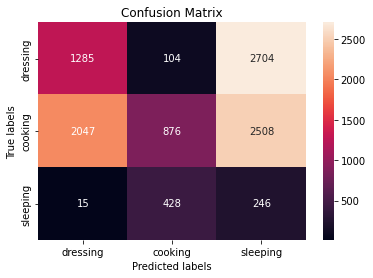

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['dressing', 'cooking','sleeping']); ax.yaxis.set_ticklabels(['dressing', 'cooking','sleeping'])

Model accuracy is 23% means our model is giving 80% exact predictions.

# **2nd Model**

# **Decision tree**

# **Hyper parameter tunning using GridSearchCV**

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
#Decision tree model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0)

# Applying Gridsearchcv by giving model decision tree
grid=GridSearchCV(model, param_grid=params, n_jobs=-1, cv=2)
grid.fit(x_train,y_train)

# Checking decision tree best parameters 
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

# Decision tree model Training

In [ ]:
## fitting the decision tree model here
classifier = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=5)
DT_model=classifier.fit(x_train,y_train)
DT_model

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

# Model prediction

In [ ]:
#Getting prediction from model by giving testing data
y_pred2= classifier.predict(x_test)
DT_prediction=pd.DataFrame(y_pred2,columns=['DT_prediction'])
DT_prediction

,DT_prediction
0,2
1,2
2,2
3,1
4,2
...,...
10208,2
10209,2
10210,2
10211,2


here 'dressing'=1, 'cooking'=3, 'sleeping'=2, here are the values are in numeric because model take numeric value and also gave numeric values. So we when we convert the categorical values into numeric so our targets was changed in this form 'dressing'=1, 'cooking'=3, 'sleeping'=2 so our results also in this form.

# Model accuracy check

In [ ]:
### Model accuracy score 
DT_model.score(x_test,y_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.10      0.18      4093
           1       0.68      0.18      0.29      5431
           2       0.03      0.40      0.06       689

    accuracy                           0.16     10213
   macro avg       0.54      0.23      0.18     10213
weighted avg       0.72      0.16      0.23     10213

[[ 400   80 3613]
 [  30  999 4402]
 [  15  398  276]]
0.16400665818075003


[Text(0, 0.5, 'dressing'), Text(0, 1.5, 'cooking'), Text(0, 2.5, 'sleeping')]

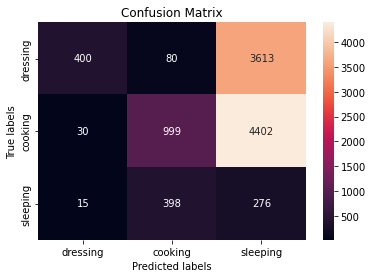

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
cm=confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['dressing', 'cooking','sleeping']); ax.yaxis.set_ticklabels(['dressing', 'cooking','sleeping'])

Decision tree is giving 16% of accuracy.

# **3rd Model**

# **ANN model**

# Importing Keras Libraries

In [ ]:
# import commands of the keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

# Appling The Artifical Neural Network

In [ ]:
## ANN model fitting
ANN=Sequential()
ANN.add(Dense(5,activation='relu',input_dim=4))
ANN.add(Dense(4,activation='relu'))
ANN.add(Dense(1,activation='relu'))
ANN.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
ANN_model=ANN.fit(x_test,y_test,batch_size=5,epochs=10)
ANN_model

Epoch 1/10
2043/2043 [==============================] - 11s 4ms/step - loss: 4.3151
Epoch 2/10
2043/2043 [==============================] - 7s 4ms/step - loss: 4.2873
Epoch 3/10
2043/2043 [==============================] - 7s 4ms/step - loss: 4.5140
Epoch 4/10
2043/2043 [==============================] - 8s 4ms/step - loss: 5.0810
Epoch 5/10
2043/2043 [==============================] - 9s 4ms/step - loss: 5.0800
Epoch 6/10
2043/2043 [==============================] - 8s 4ms/step - loss: 5.0812
Epoch 7/10
2043/2043 [==============================] - 7s 4ms/step - loss: 5.0791
Epoch 8/10
2043/2043 [==============================] - 7s 4ms/step - loss: 5.0802
Epoch 9/10
2043/2043 [==============================] - 7s 4ms/step - loss: 5.0803
Epoch 10/10
2043/2043 [==============================] - 7s 4ms/step - loss: 5.0838


# Model prediction

In [ ]:
###Getting prediction from the ANN model by giving testing data And showing the prediction into dataframe 
y_pred3=ANN.predict(x_test)
y_pred3=(y_pred3>0.5)
ANN_prediction=pd.DataFrame(y_pred3,columns=['ANN predictions'])

# Model accuracy check

In [ ]:
print('Classifcation report:\n', classification_report(y_test, y_pred3))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred3)
print('Confusion matrix:\n', conf_mat)
accuracy_score(y_test, y_pred3)

Classifcation report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4093
           1       0.53      1.00      0.69      5431
           2       0.00      0.00      0.00       689

    accuracy                           0.53     10213
   macro avg       0.18      0.33      0.23     10213
weighted avg       0.28      0.53      0.37     10213

Confusion matrix:
 [[   0 4093    0]
 [   0 5431    0]
 [   0  689    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.531773230196808

[Text(0, 0.5, 'dressing'), Text(0, 1.5, 'cooking'), Text(0, 2.5, 'sleeping')]

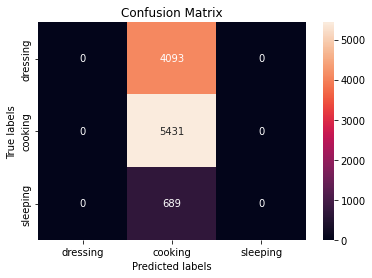

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
cm=confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['dressing', 'cooking','sleeping']); ax.yaxis.set_ticklabels(['dressing', 'cooking','sleeping'])

ANN is giving 53% of accuracy.

# **4th model**

# **Vooting Classifier**

In [ ]:
## Import command of vooting classifier from sklearn ensemble library
from sklearn.ensemble import VotingClassifier

In [ ]:
# group / ensemble of models
estimator = []
estimator.append(('RF',RandomForestClassifier()))
estimator.append(('DT',DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=20)))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train,y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('DT',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=20))])

# Model prediction

In [ ]:
###Getting prediction from the vooting Classifier model by giving test data And showing the prediction into dataframe 
y_pred4 = vot_hard.predict(x_test)
Vote_prediction=pd.DataFrame(y_pred4,columns=['Vote_prediction'])

# Model accuracy check

In [ ]:
print('Classifcation report:\n', classification_report(y_test, y_pred4))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred4)
print('Confusion matrix:\n', conf_mat)
accuracy_score(y_test, y_pred4)

Classifcation report:
               precision    recall  f1-score   support

           0       0.38      0.31      0.35      4093
           1       0.64      0.19      0.29      5431
           2       0.04      0.28      0.06       689

    accuracy                           0.25     10213
   macro avg       0.35      0.26      0.23     10213
weighted avg       0.49      0.25      0.30     10213

Confusion matrix:
 [[1285  104 2704]
 [2047 1025 2359]
 [  15  481  193]]


0.2450798002545775

[Text(0, 0.5, 'dressing'), Text(0, 1.5, 'cooking'), Text(0, 2.5, 'sleeping')]

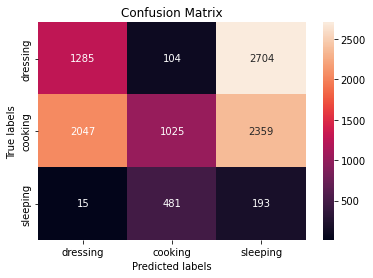

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
cm=confusion_matrix(y_test, y_pred4)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['dressing', 'cooking','sleeping']); ax.yaxis.set_ticklabels(['dressing', 'cooking','sleeping'])

Vooting Classifier accuracy is 24%

# **Classifiers Accuracy  Comaprision**

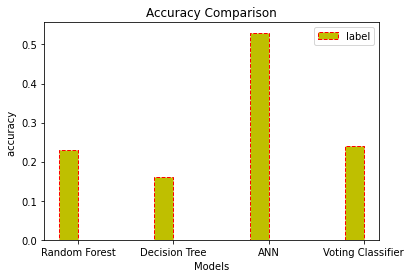

In [ ]:
import numpy as np
classes=["Random Forest","Decision Tree","ANN","Voting Classifier"]
label=[0.23,0.16,0.53,.24]
Class_index=np.arange(len(classes))
width=0.2
plt.bar(Class_index,label,width=0.2,color="y",linestyle="--",edgecolor="r",
        label="label",align="edge")
plt.xticks(Class_index+width,classes)
plt.title("Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("accuracy ")
plt.legend()
plt.show()

In [ ]:
## making a dataframe where we are going to show the actul value and all model predicted value in one frame
frames=[y,RF_prediction,DT_prediction,ANN_prediction,Vote_prediction]
pd.concat(frames,axis=1, join="inner")

,sensorBookmarkName,RF_prediction,DT_prediction,ANN predictions,Vote_prediction
0,1,2,2,True,2
1,1,0,2,True,0
2,1,0,2,True,0
3,1,1,1,True,1
4,1,2,2,True,2
...,...,...,...,...,...
10208,2,2,2,True,2
10209,2,2,2,True,2
10210,2,2,2,True,2
10211,2,0,2,True,0
